In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import scipy.linalg

In [57]:
#Import data

#Dataset #1
games_details = pd.read_csv ("./data/games_details.csv")
games = pd.read_csv ("./data/games.csv")
players = pd.read_csv ("./data/players.csv")
ranking = pd.read_csv ("./data/ranking.csv")
teams = pd.read_csv ("./data/teams.csv")

#Dataset #2
data2 = pd.read_csv ("./data/all_seasons.csv")
data2 = data2.drop(data2[data2.draft_round == 'Undrafted'].index)
data2['draft_round'] = pd.to_numeric(data2['draft_round'])

#Dataset #3
draft_data = pd.read_csv ("./data/NBA_Draft_1980_2017.tsv", sep = '\t')

C:\Users\Jeff\AppData\Local\Temp\ipykernel_19844\3787777795.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  games_details = pd.read_csv ("./data/games_details.csv")


In [58]:
data2_players = data2[['net_rating', 'age', 'player_height', 'player_weight', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]

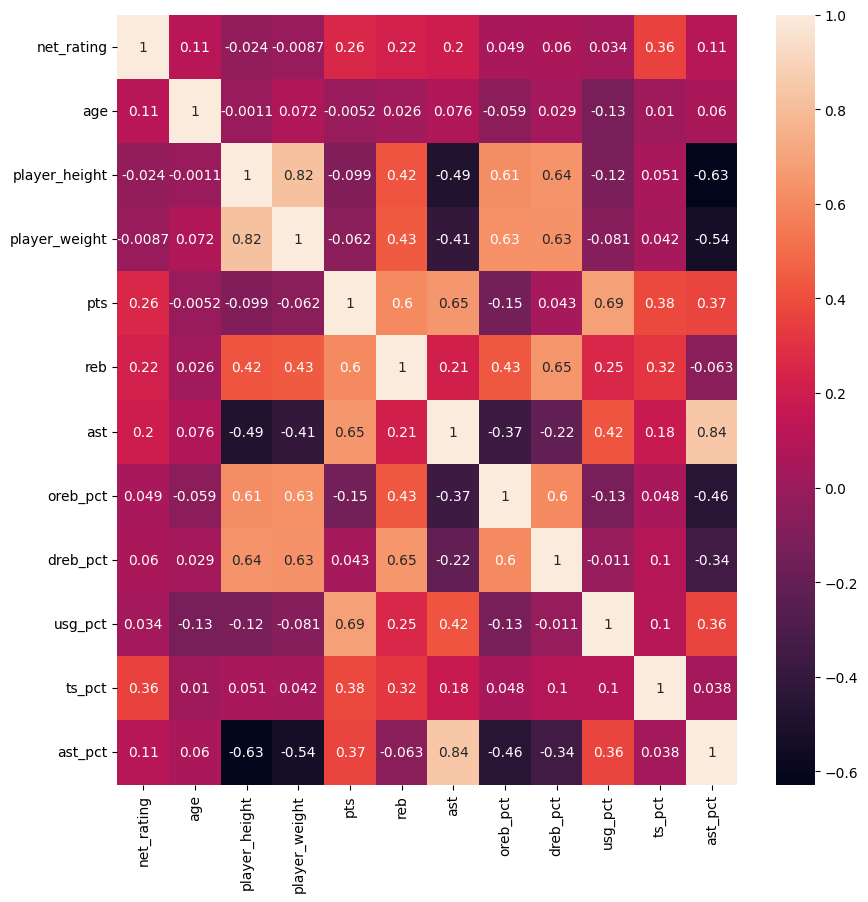

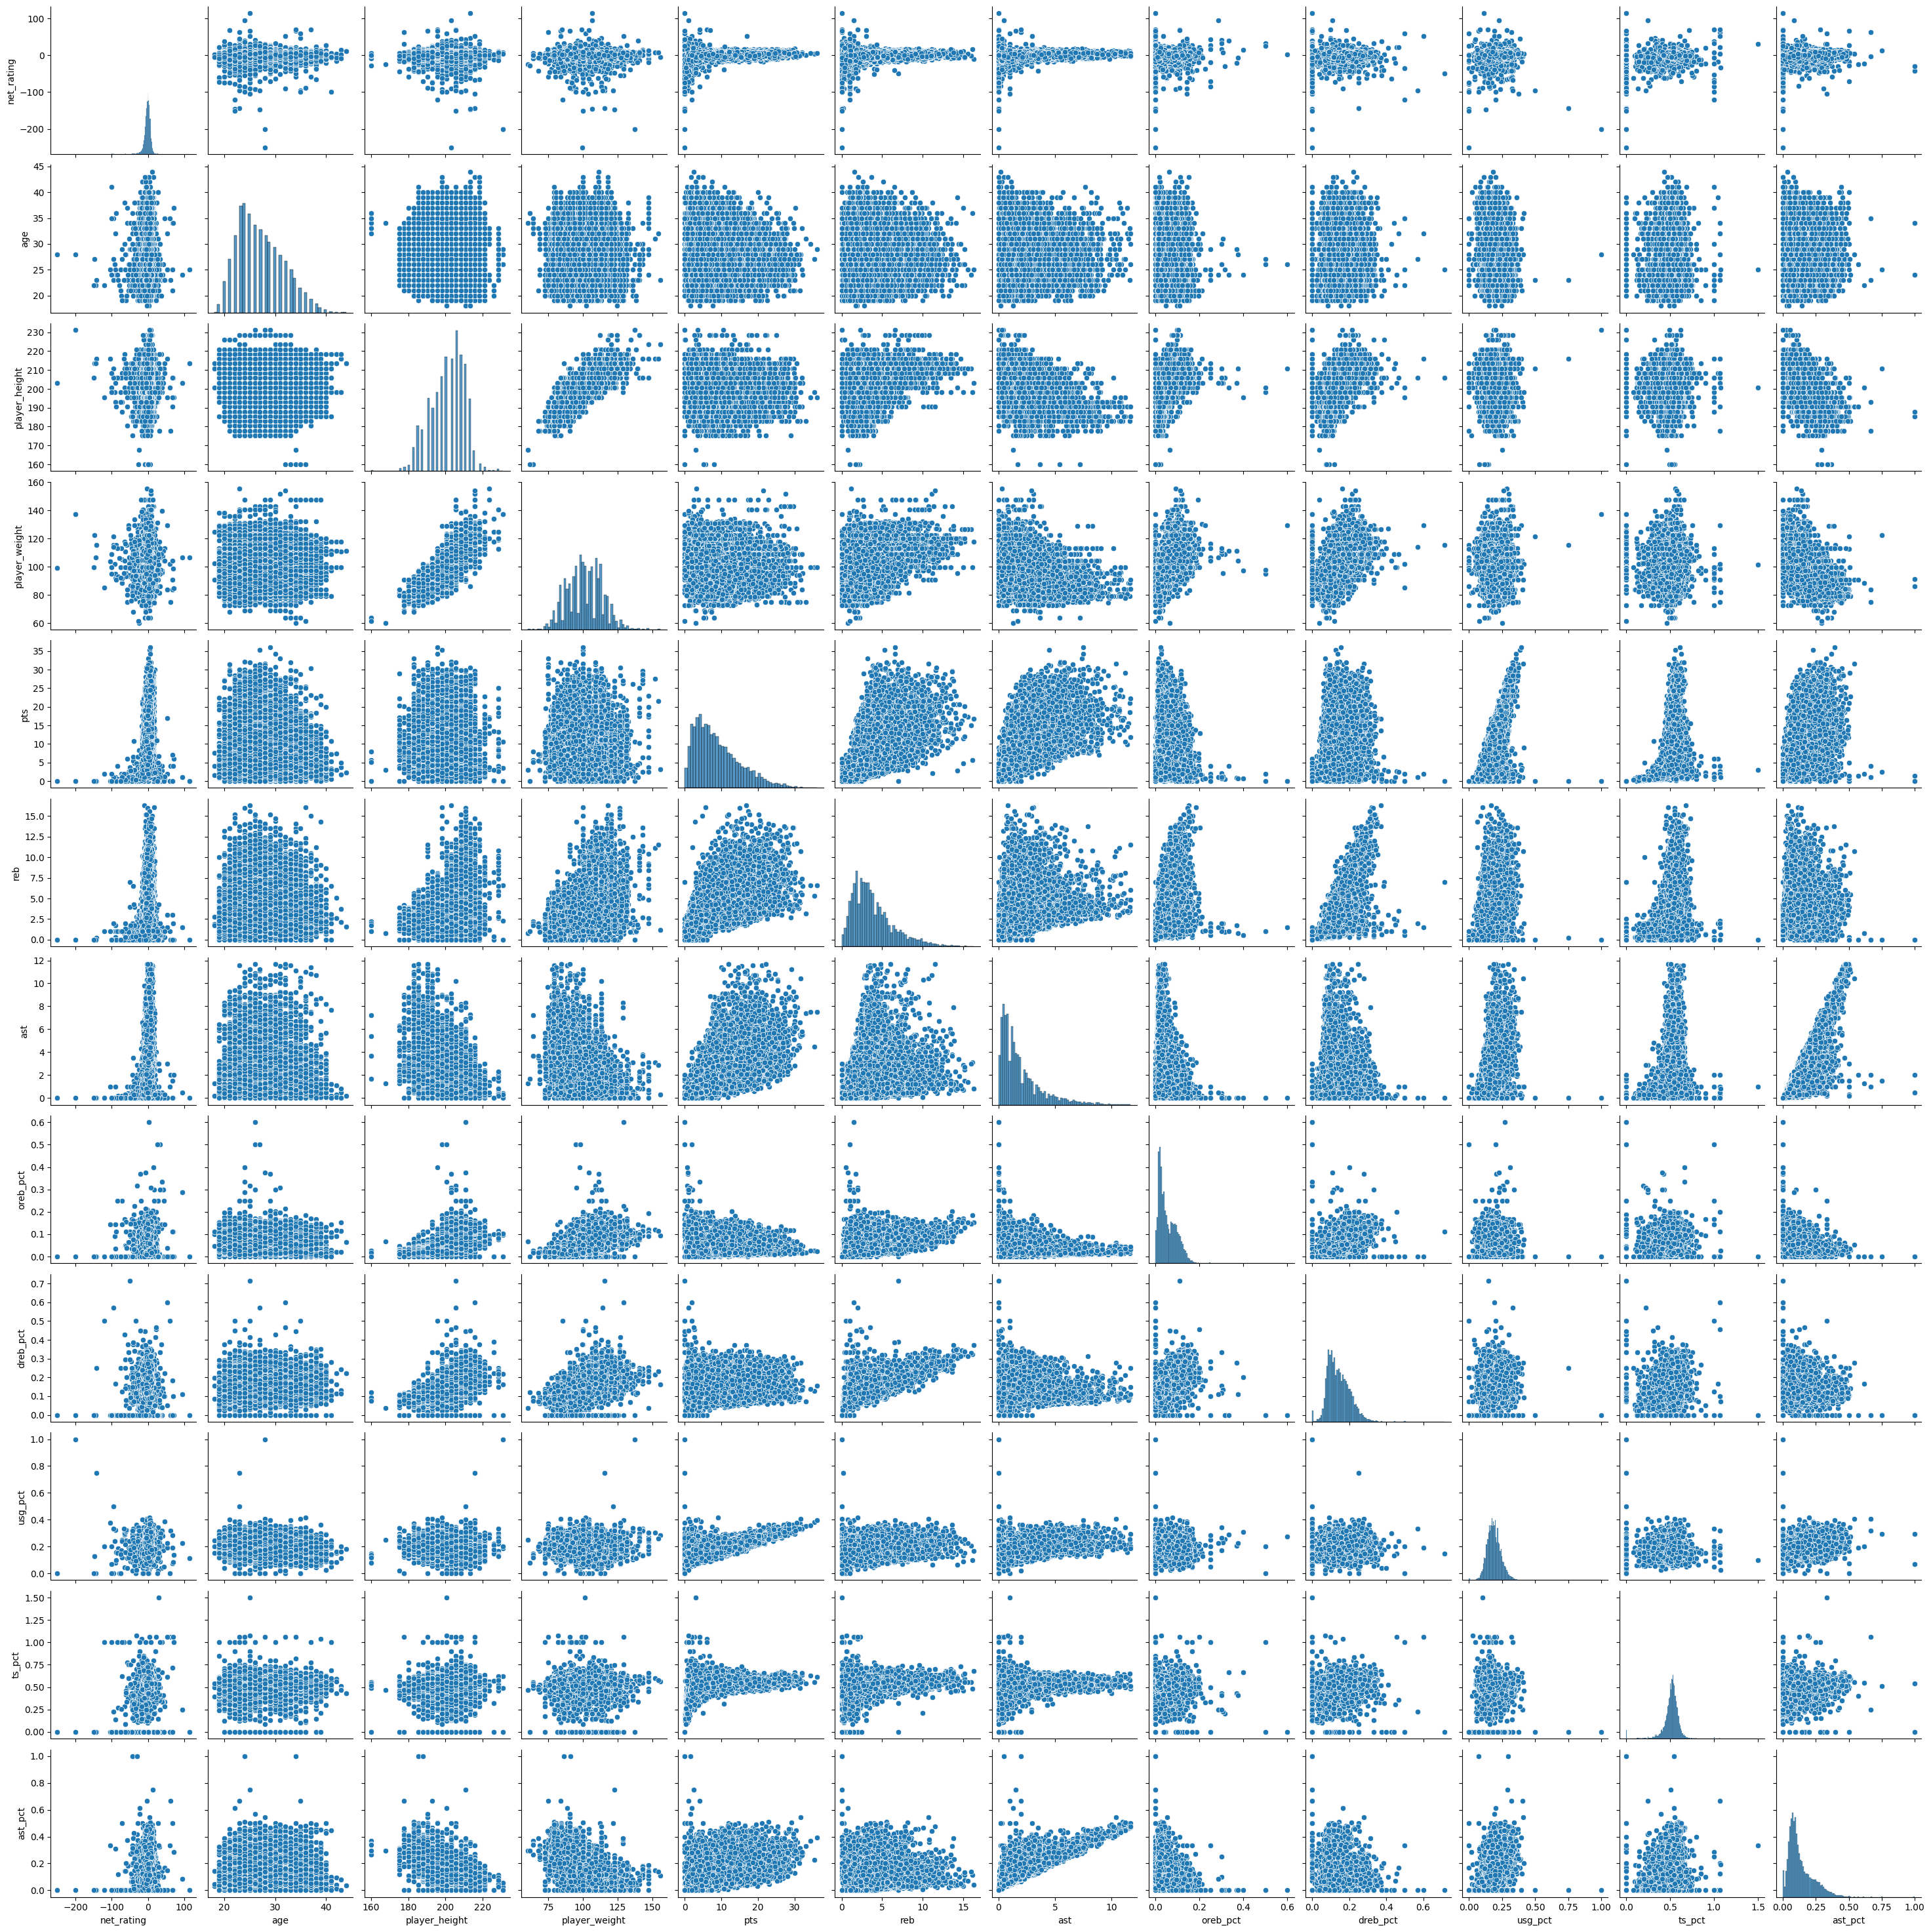

In [59]:
#Visualization
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data2_players.corr(), annot=True)
sns.pairplot(data2_players)

In [60]:
X = data2[['age', 'player_height', 'player_weight', 'pts', 'reb', 'ast', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct']]
X = X.to_numpy()
y = data2['net_rating']
y = y.to_numpy()

In [61]:
y

array([16.1, 12.3, -2.1, ...,  4.5, -5.3,  9.3])

In [62]:
XX = X.T @ X
L, U, P = scipy.linalg.lu(XX)
#bs = scipy.linalg.solve_triangular(L, P @ X.T @ y, lower=True)
#betahat = scipy.linalg.solve_triangular(U, bs, lower=False)

In [63]:
#Using dataset #1
home = games.iloc[:,7:13]
away = games.iloc[:,14:20]
home['home'] = 1
away['home'] = 0
home = home.rename(columns={'PTS_home': 'PTS', 'FG_PCT_home': 'FG_PCT', 'FT_PCT_home': 'FT_PCT', 'FG3_PCT_home': 'FG3_PCT', 'AST_home': 'AST', 'REB_home': 'REB'})
away = away.rename(columns={'PTS_away': 'PTS', 'FG_PCT_away': 'FG_PCT', 'FT_PCT_away': 'FT_PCT', 'FG3_PCT_away': 'FG3_PCT', 'AST_away': 'AST', 'REB_away': 'REB'})
result = home.append(away, ignore_index=True)

#Normalize
scaler = MinMaxScaler()
result['PTS'] = scaler.fit_transform(result[['PTS']])
result['AST'] = scaler.fit_transform(result[['AST']])
result['REB'] = scaler.fit_transform(result[['REB']])

C:\Users\Jeff\AppData\Local\Temp\ipykernel_19844\960497775.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = home.append(away, ignore_index=True)


<AxesSubplot: >

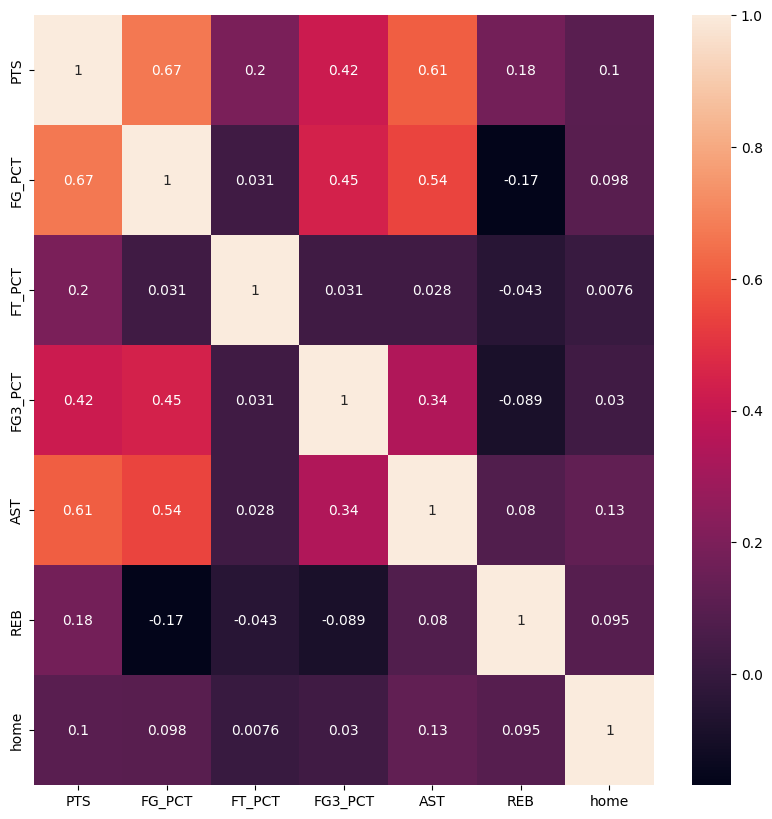

In [64]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(result.corr(), annot=True)

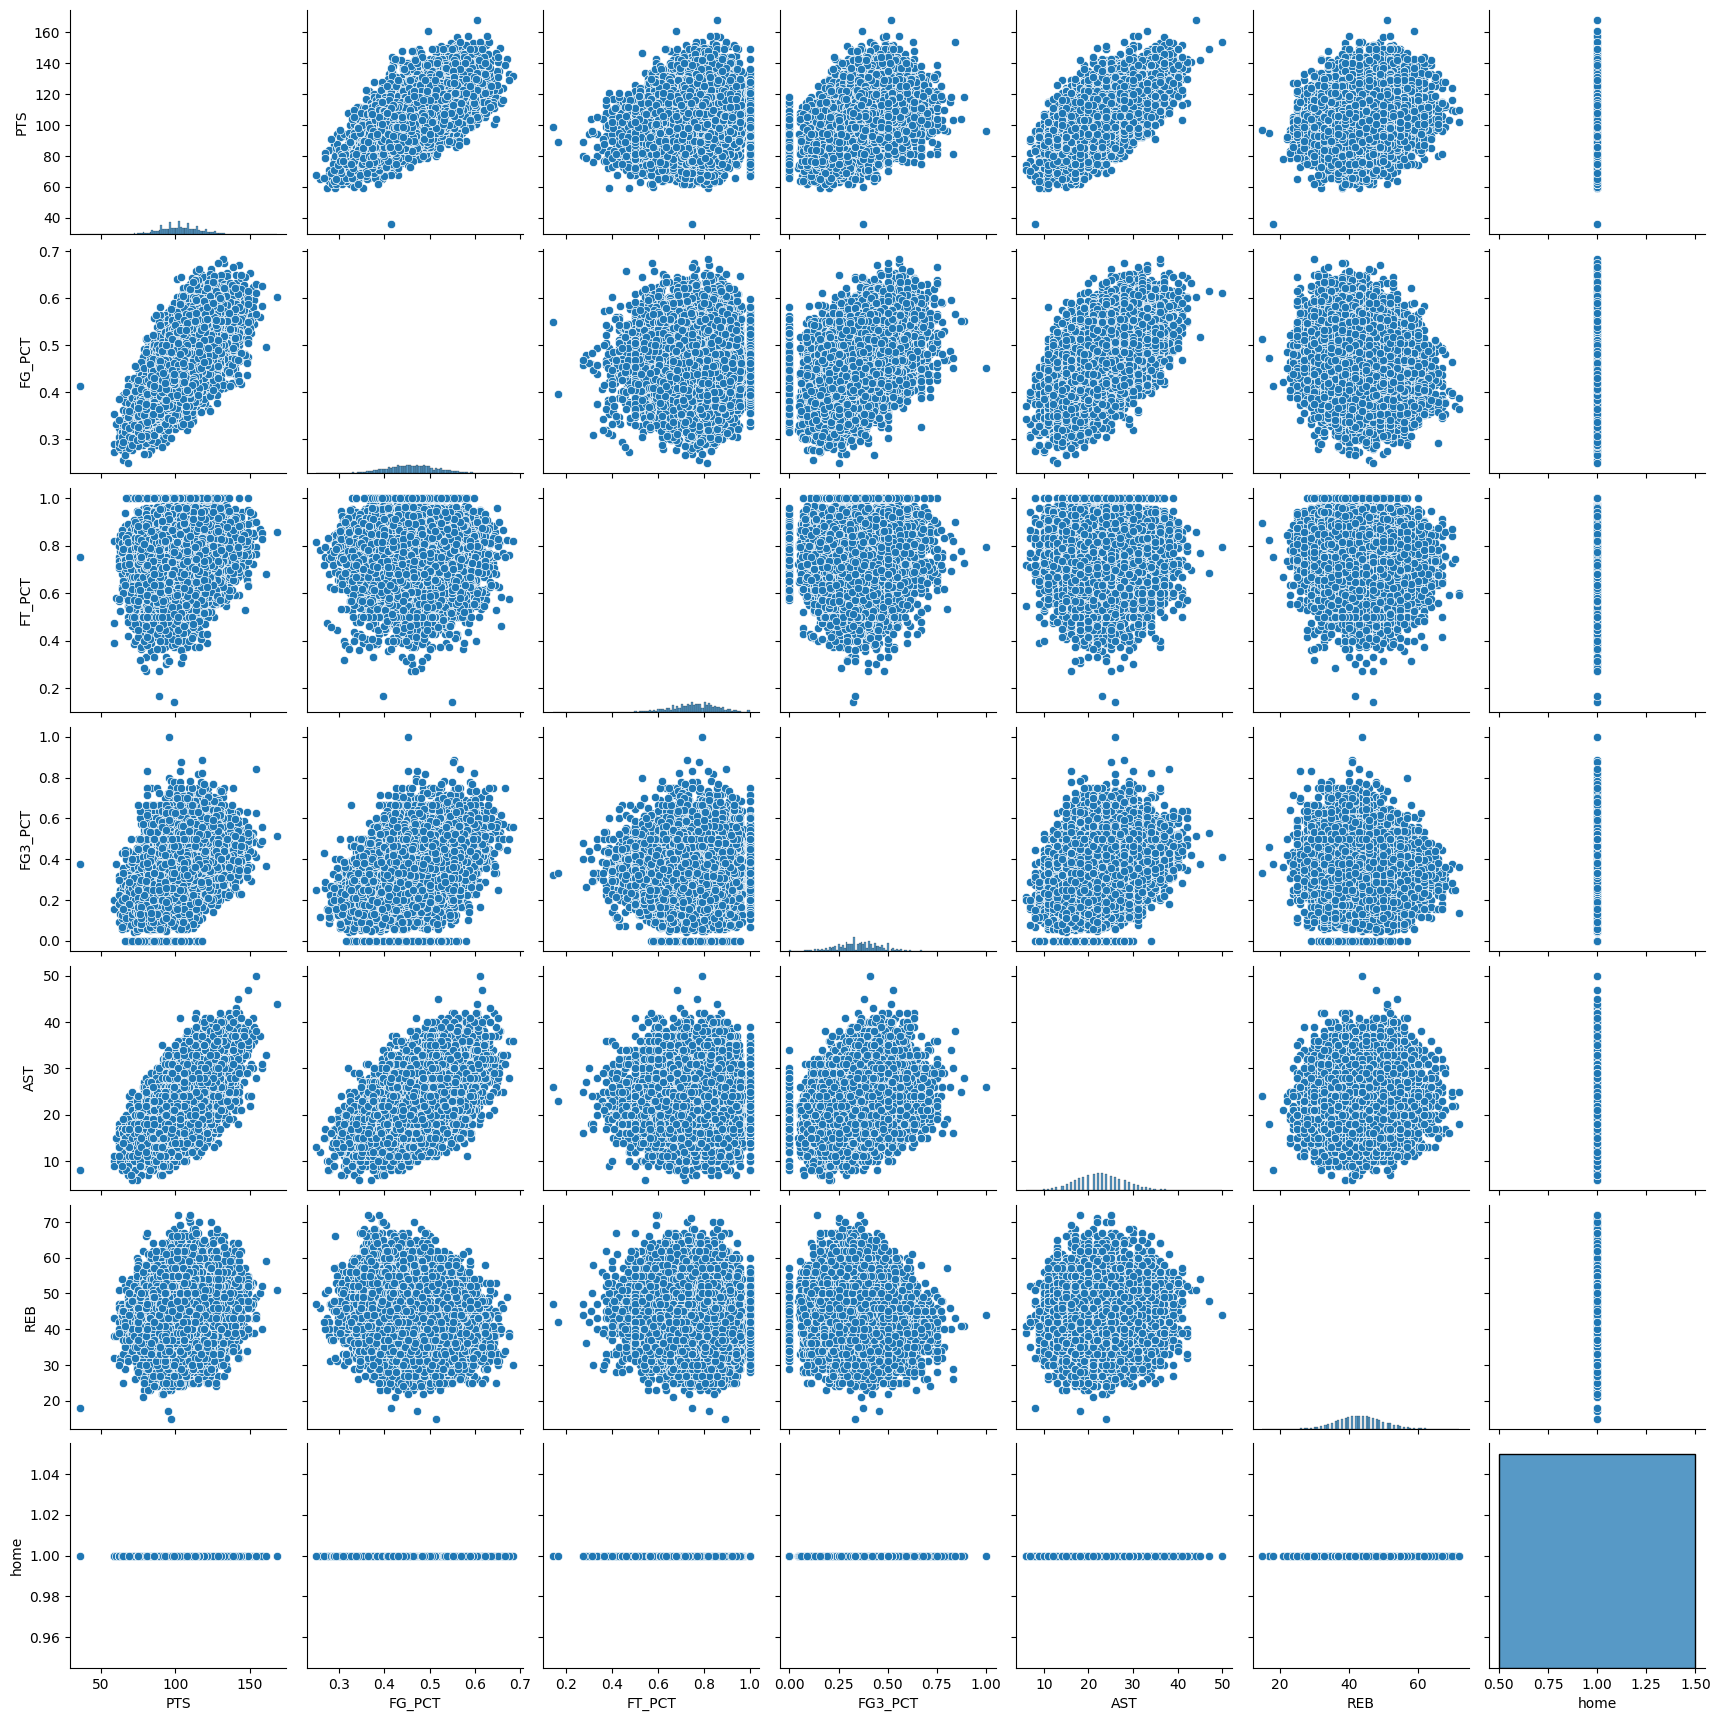

In [65]:
sns.pairplot(home)